In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv(r'C:\Users\ANOVA AJAY PANDEY\Desktop\SEM4\CSE 3021 SIN\proj\stock analysis\Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [3]:
dataset = pd.read_csv(r'C:\Users\ANOVA AJAY PANDEY\Desktop\SEM4\CSE 3021 SIN\proj\stock analysis\Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [4]:
dataset.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-22,790.90,792.74,787.28,789.91,"6,23,400"
2018-12-22,790.68,797.86,787.66,791.55,"7,89,100"
2019-01-01,793.70,794.23,783.20,785.05,"11,53,800"
2019-01-01,783.33,785.93,778.92,782.79,"7,44,300"
2019-01-01,782.75,782.78,770.41,771.82,"17,70,000"


In [5]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2019-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [1]:
dataset['Open'].plot(figsize=(16,6))

NameError: name 'dataset' is not defined

In [8]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)

In [9]:

dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [10]:
# 7 day rolling mean
dataset.rolling(7).mean().tail(20)

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-02,762.231429,768.307143,754.110000,759.744286,1.819129e+06
2018-12-05,760.800000,767.681429,753.774286,759.962857,1.807100e+06
2018-12-06,760.867143,768.228571,753.320000,759.595714,1.964714e+06
2018-12-07,761.010000,767.061429,752.748571,760.017143,1.903686e+06
2018-12-08,761.145714,767.015714,752.604286,760.814286,1.885329e+06
2018-12-09,762.564286,769.364286,756.060000,765.278571,1.803757e+06
2018-12-12,766.507143,773.850000,762.820000,771.185714,1.673214e+06
2018-12-13,773.551429,781.047143,769.997143,777.700000,1.772171e+06
2018-12-14,779.221429,786.775714,775.870000,782.635714,1.816457e+06


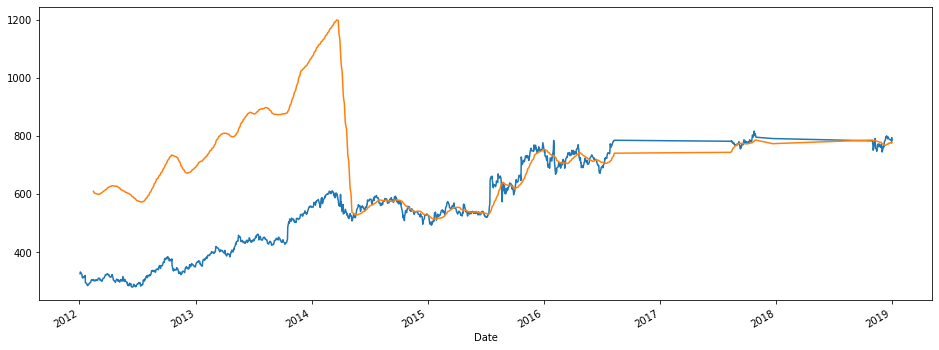

In [11]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

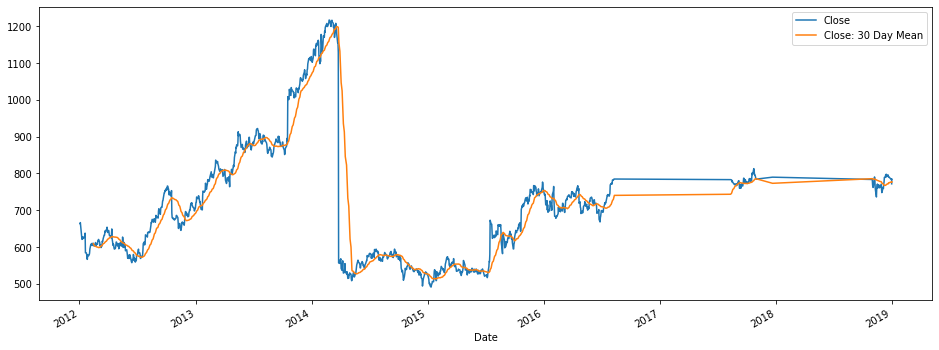

In [12]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

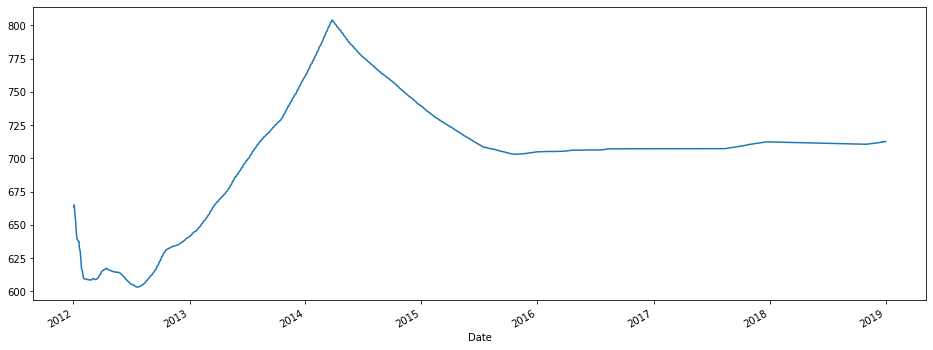

In [13]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [14]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [15]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [18]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

ModuleNotFoundError: No module named 'keras'

In [19]:
# Initialising the RNN
regressor = Sequential()

NameError: name 'Sequential' is not defined

In [58]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

NameError: name 'regressor' is not defined

In [20]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(Dropout(0.2))

In [22]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [24]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0366
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0061
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

In [25]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv(r'C:\Users\ANOVA AJAY PANDEY\Desktop\SEM4\CSE 3021 SIN\proj\stock analysis\Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [26]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"16,57,300"
2017-01-04,788.36,791.34,783.16,786.90,"10,73,000"
2017-01-05,786.08,794.48,785.02,794.02,"13,35,200"
2017-01-06,795.26,807.90,792.20,806.15,"16,40,200"
2017-01-09,806.40,809.97,802.83,806.65,"12,72,400"


In [82]:
dataset_test.info()

NameError: name 'dataset_test' is not defined

In [81]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

NameError: name 'dataset_test' is not defined

In [30]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [80]:
test_set.info()

NameError: name 'test_set' is not defined

In [32]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

NameError: name 'regressor' is not defined

In [33]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

NameError: name 'predicted_stock_price' is not defined

In [79]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

NameError: name 'real_stock_price' is not defined